<a href="https://colab.research.google.com/github/IslombekTurakulov/NotebookWorks/blob/main/TurakulovIslombek_Calculus_17_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, Function, dsolve, solveset, plot_implicit, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt
%matplotlib inline

## Занятие 17
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
## Задание № 1
Решить аналитически ОДУ с разделяющимися переменными
$$
y'=\ln(x+2)e^{2-y}.
$$
Найти общий интеграл. 

In [3]:
x, y, C = symbols('x y C', real=True)
ODE = sympy.Eq(integrate(Exp(2 - y), y), integrate(Log(x + 2), x) + C)
display(ODE)

Eq(-exp(2 - y), C + x*log(x + 2) - x + 2*log(x + 2))

## Задание № 2
Решить аналитически задачу Коши
$$
y^3y'=\frac{1}{1+x^2},\qquad y(0)=1.
$$
Найти общий интеграл, учесть начальное условие. 
Построить график $y$, пользуясь plot_implicit.

In [4]:
x, y, C = symbols('x y C', real = True)
ODE = sympy.Eq(integrate(y**3, y), integrate(1/(1 + x**2), x) + C)
display(ODE)

Eq(y**4/4, C + atan(x))

In [5]:
x0y0 = {x: 0, y: 1}
Cval = solveset(sympy.Eq(ODE.lhs.subs(x0y0), ODE.rhs.subs(x0y0)), C)
Cval

FiniteSet(1/4)

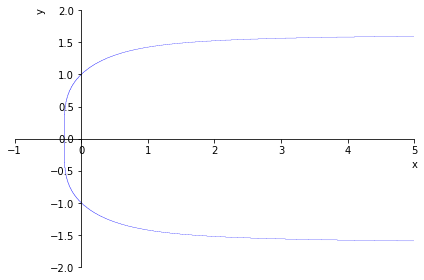

In [6]:
plot_implicit(sympy.Eq(ODE.lhs, ODE.rhs.subs(C, *Cval)),(x, -1, 5), (y, -2, 2), linewidth=2)

## Индивидуальное задание № 139
Решить задачу Коши аналитически, методом Эйлера и методом Рунге-Кутты. Построить в одной координатной плоскости графики точного и приближенных решений.

$\frac{d}{dx}y(x) = -8\sqrt{x}y(x)-3\sqrt{x} \underbrace{\implies}_{y(x) = y} $ $\frac{d}{dx}y = -8\sqrt{x}y-3\sqrt{x}$         
$\ y(0)=3 $

Упростим задачу:

$\frac{dy}{dx} = \sqrt{x}(-8y-3)$

Умножаем на ${dx}$

${dy}= \sqrt{x}(-8y-3){dx}$

Делим на $-8y-3$

$\frac{dy}{-8y-3}= \sqrt{x}{dx}$

Решим задачу с разделяющимися переменными

__1. Решим задачу Коши аналитически__

In [7]:
x, y, C = symbols('x y C', real = True)
ODE = sympy.Eq(integrate(1/(-3-8*y), y), integrate(x**(S.Half), x) + C)
display(ODE)

Eq(-log(8*y + 3)/8, C + 2*x**(3/2)/3)

In [8]:
x0y0 = {x: 0, y: 3}
Cval = solveset(sympy.Eq(ODE.lhs.subs(x0y0), ODE.rhs.subs(x0y0)), C)
Cval

FiniteSet(-log(27)/8)

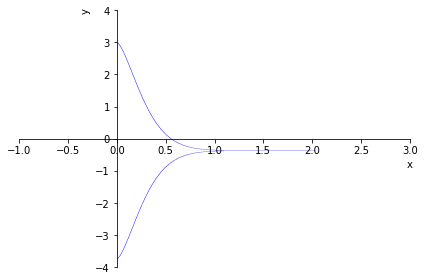

In [9]:
p = plot_implicit(sympy.Eq(sympy.re(ODE.lhs), ODE.rhs.subs(C, *Cval)),(x, -1, 3), (y, -4, 4))

__2. Решим задачу методом Эйлера__

In [10]:
def draw(x0, xf, h, labels, *args):
    assert len(labels) == len(args)

    xs = np.arange(x0, xf, h)

    for (i, ys) in enumerate(args):
        print(len(xs), len(ys), xs[0], ys[0], xs[-1], ys[-1])
        plt.plot(xs, ys, label=labels[i], linewidth=1)
    plt.xlabel('H')
    plt.ylabel('Y')
    plt.title("Result")
    plt.legend()
    plt.show()

In [11]:
# Эти функции были взяты с гита https://github.com/mdmxfry/DE-methods потому-что я не знаю как можно сделать это здесь
class Exact:
    def __init__(self, solved_equation, h):
        self.f = solved_equation
        self.h = h

    def _next_y(self, xi, yi):
        """
        Считает y[i+1] следующим образом:
            y[i+1] = f(x[i+1])
        P.S.
        Функция вынесена таким образом, чтобы в след. методах (классах)
        можно было просто перегрузить ее и получить новый метод не дублируя код.
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        return self.f(xi)

    def calculate(self, x0, y0, xf):
        """
        Вычисляет значения на промежуте [x0;xf] с шагом h выражения f
        :param x0:
        :param y0:
        :param xf:
        :return: список значений приближения для промежутка [x0;xf]
        """
        ys = []
        xs = np.arange(x0 + self.h, xf + self.h, self.h)  # вектор всех значений x
        y = y0
        for x in xs:
            ys.append(y)
            y = self._next_y(x, y)
        return ys


class Euler(Exact):
    def _next_y(self, xi, yi):
        """
        Считает y[i+1] исходя из x[i] и y[i] следующим образом:
            y[i+1] = y[i] + h * f(xi, yi)
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        return yi + self.h * self.f(xi, yi)


class ImprovedEuler(Euler):
    def _next_y(self, xi, yi):
        """
        Считает y[i+1] исходя из x[i] и y[i] следующим образом:
            y[i+1] = y[i] + h * f(xi + h/2, yi + h/2 * f(xi, yi))
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        h2 = self.h / 2
        delta_y = self.h * self.f(xi + h2, yi + h2 * self.f(xi, yi))
        return yi + delta_y


class RungeKutta(Euler):
    def _next_y(self, xi, yi):
        """
        Считает y[i+1] исходя из x[i] и y[i] следующим образом:
            y[i+1] = y[i] + h/6 * (k1 + 2k2+ 2k3 + k4)
            k1 = f(xi, yi)
            k2 = f(xi + h/2, yi + h/2 * k1)
            k3 = f(xi + h/2, yi + h/2 * k2)
            k4 = f(xi + h, yi + h * k3)
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        h2 = self.h / 2
        k1 = self.f(xi, yi)
        k2 = self.f(xi + h2, yi + h2 * k1)
        k3 = self.f(xi + h2, yi + h2 * k2)
        k4 = self.f(xi + self.h, yi + self.h * k3)
        return yi + (self.h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

0.01
0.060000000000000005
0.11
0.16000000000000003
0.21000000000000002
0.26
0.31000000000000005
0.36000000000000004
0.41000000000000003
0.46
0.51
0.56
0.6100000000000001
0.66
0.7100000000000001
0.76
0.81
0.8600000000000001
0.91
0.9600000000000001
20 20 0.01 0 0.9600000000000001 0
20 20 0.01 0 0.9600000000000001 0


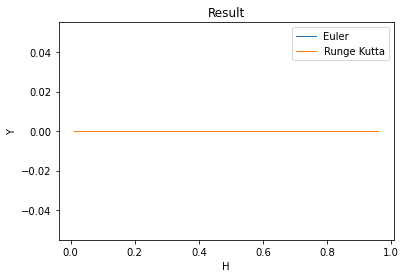

In [12]:
C = 9/2
HS = 0.01
HF = 1.01
HH = 0.05
X0 = 0
Y0 = 3
XF = 0


def calculate_error(ys_approx, ys_exact):
    return [abs(y1 - y2) for y1, y2 in zip(ys_approx, ys_exact)]


def calculate_mean_error(ys_approx, ys_exact):
    if (len(ys_exact) == 0):
      return 0
    else:
      return sum(calculate_error(ys_approx, ys_exact))/len(ys_exact)
      
euler_error = []
better_euler_error = []
rk_error = []
h_axis = np.arange(HS, HF, HH)
for H in h_axis:
    print(H)
    exact = Exact(ODE, H)
    exact_ys = exact.calculate(X0, Y0, XF)

    euler = Euler(-8*x**(S.Half)*y - 3*x**(S.Half), H)
    euler_ys = euler.calculate(X0, Y0, XF)

    runge_kutta = RungeKutta(-8*x**(S.Half)*y - 3*x**(S.Half), H)
    rk_ys = runge_kutta.calculate(X0, Y0, XF)

        # draw(X0, XF, H, ['Exact', 'Euler'], exact_ys, euler_ys)
        # draw(X0, XF, H, ['Exact', 'Improved Euler'], exact_ys, b_euler_ys)
        # draw(X0, XF, H, ['Exact', 'Runge Kutta'], exact_ys, rk_ys)

    euler_error.append(calculate_mean_error(euler_ys, exact_ys))
    rk_error.append(calculate_mean_error(rk_ys, exact_ys))

draw(HS, HF, HH, ['Euler', 'Runge Kutta'], euler_error, rk_error)